# Optimization

Optimization might be the most important concept for you to learn since...walking...
In your career so far you might have used analytical solutions to find a specific outcome and that's great. But the world is a dark place and answer are rarely black or white. Most of the time there are tread offs and you have to balance different aspects, e.g. studying and happiness. 

Optimization gives you a tool to solve problems where you need balance different things you want.
Let's make an example: 
You want to spend your money so it gives you the most utility. You are a simple minded person (not abstractly, I mean you specifically) and all the things that you like is ordering pizza and playing video games.
You rate Pizza with a Utility of 1 and it costs 10€.
You rate video games with 10 and it costs 60€. 
But let's say any additional video game you buy as a deminishing marginal value to you. More is still better but the next one isn't as much fun to you as the first, because you cannot find all the items in each or so...you are also pendant. Let's say the utility for you next game is 1/(number_of_games_you_already_own). 
You can spend 200€ a month. How to make best use of that money?! You could iterate through all the combinations (3 games + 2 Pizzas = x Utility; 2 games + 8 Pizzas = y Utility ... and so on) and pick the one with the most utility at the end. But let's say you wouldn't be such a simple person. Let's say you would like 3 things or 4 or more realistically, hundreds. Have fun going through all the combinations! 

Optimization gives you methods to solve problems like this! It is actually a valuable lens to see the world through and a bunch of research fields revolve around it like machine learning, control theory, operations research and many more. 

For us, optimization is useful for basically all kinds of prediction models as we will see in the next weeks.

Today we focus on a subsection of optimization, namely unconstrained, continuous optimization.

In [1]:
import matplotlib.pyplot as plt
import torch

# Analytical Optimization in 1D
In school and in higher maths you have probably learned how to find the minimum of a function analytically. This is done by finding the zero of the first derivative of the function. The zero of the first derivative is called a stationary point. If the second derivative is positive at the stationary point, the function has a minimum at this point. If the second derivative is negative, the function has a maximum at this point. If the second derivative is zero, the function has an inflection point at this point.
Lets look at an example: We will define the function $f_1(x) = x^2$. This is a simple parabola with a minimum at $x=0$. We plug in $x=1$ to see if the function is really $f_1(1) = 1^2 = 1$. 

In [2]:
x = torch.ones(1) # define the variable x
# define the function f1
def f1(x):
    y = x**2
    return y

print(f"f1 = {f1(x)}, x = {x}") # show the function f1

f1 = tensor([1.]), x = tensor([1.])


Works! This function is rather simple. It is a parabola with a minimum at x=0. Lets calculate the first and second derivative of this function and find the zero of the first derivative. We can use Pytorch to calculate the Jacobian matrix of the function. The Jacobian matrix is the matrix of all first order partial derivatives of a vector-valued function. In our case the vector-valued function is a scalar function so it won't be a matrix, acutally. 


In [3]:
df1 = torch.func.jacfwd(f1) # define a function, that calculates the first derivative of f1
df1(x) # show the first derivative of f1

tensor([[2.]])

The first derivative is $f_1'(x)=2x$. Again, we plug in $x=1$ which gives $f_1'(1) = 2 \cdot 1 = 2$. Let's find the zero of this function. Pytorch has build in solvers for linear equations. We can use the solver to find the zero of the first derivative. This is the minimum of the function.

In [4]:
df1_zero = torch.linalg.solve(df1(x), torch.zeros(1)) # define a function that solves the first derivative for x, which means find the zero of the first derivative
df1_zero # show the zero of the first derivative

tensor([0.])

The zero of the first derivative is $x=0$. This is the minimum of the function $f_1$. Lets calculate the second derivative of the function $f_1$ and check if the second derivative is positive at the stationary point.

In [5]:
ddf1 = torch.func.jacfwd(df1) # calculate the second derivative of f1
ddf1(x) # show the second derivative of f1

tensor([[[2.]]])

The second derivative is 2. This is positive. Therefore, the function $f_1$ has a minimum at $x=0$.

Now lets plot the function $f_1$ and the first and second derivative. First we need to convert the torch functions to numpy functions to evaluate them at a range of values.

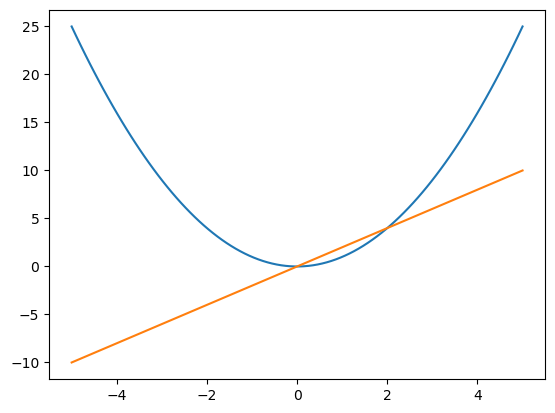

In [6]:
plot_range = torch.linspace(-5,5,100).squeeze() # define the range of values to plot
plt.plot(plot_range, f1(plot_range)) 
df1_plot_points = df1(plot_range).diag() # plot the function f1
plt.plot(plot_range, df1_plot_points) # plot the first derivative of f1


Here we can verify that the function $f_1$ has a minimum at $x=0$. The first derivative is zero at $x=0$. The second derivative is positive at $x=0$.

# Numerical Optimization in 1D
Now lets look at how to find the minimum of a function numerically. We will use the function $f_1$ from above. To find the minimum of a function numerically, we need to define an initial condition. This is the starting point of the optimization. We will start at $x=4.5$. Then we will calculate the first derivative of the function at this point. This is the gradient of the function at this point. The gradient tells us in which direction the function is increasing. We will then take a step in the opposite direction of the gradient. This is called gradient descent. We will repeat this process until we reach the minimum of the function. Let's define gradient descent as a function:

In [7]:
def gradient_descent_iteration(df_func, initial_condition, step_size):
    """ Gradient descent iteration """
    x_next = initial_condition - step_size * df_func(initial_condition)
    return x_next

def gradient_descent(f_func, df_func, initial_condition, step_size, number_of_iterations):
    """ Gradient descent
    This uses the gradient descent iteration function defined above until the predefined
    number of iterations is reached.
    """
    x_list = [initial_condition.squeeze()] # initialize the list of x values
    # x_list.append(torch.tensor([initial_condition])) # initialize the list of x values
    for _ in range(number_of_iterations): # loop over the number of iterations
        x_step = gradient_descent_iteration(df_func, x_list[-1], step_size).squeeze() # calculate the next x value
        x_list.append(x_step) # append the next x value to the list of x values
    x_opt = x_list[-1] # the last x value is the optimal x value
    x_mat = torch.stack(x_list, dim=0).squeeze() # convert the list of x values to a numpy array
    y_mat = f_func(x_mat) # calculate the corresponding y values
    y_opt = y_mat[-1] # the last y value is the optimal y value
    return x_opt, y_opt, x_mat, y_mat

Now lets use this function to find the minimum of the function f1. We will start at $x=4.5$ and take $200$ steps with a step size of $0.01$. We will plot the function f1 and the steps we take.

In [8]:
initial_condition = torch.tensor([4.5]) # define the initial condition
step_size = 0.01 # define the step size
number_of_iterations = 300 # define the number of iterations
x_opt, y_opt, x_mat, y_mat = gradient_descent(f1, df1, initial_condition, step_size, number_of_iterations) # run gradient descent

Feel free to play around with the initial condition, step size and number of iterations to see how this affects the result. Gradient descent needs a good chunk of iterations to converge. If you choose a step size that is too large, the algorithm will not converge. If you choose a step size that is too small, the algorithm will converge very slowly. If you choose an initial condition that is too far away from the minimum, the algorithm will likely not converge.
Now lets plot the function f1 and the steps we took.

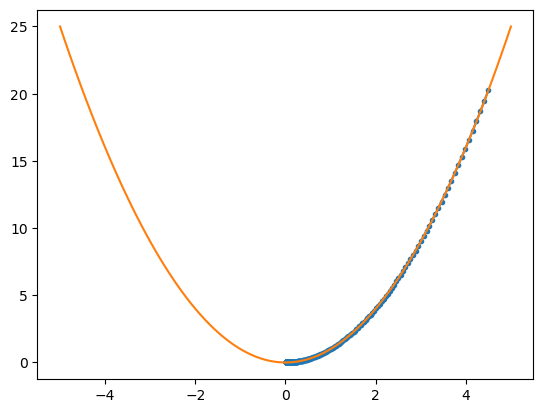

In [9]:
plt.plot(x_mat, y_mat, marker='.') # plot the steps we took
plt.plot(plot_range, f1(plot_range)) # plot the function f1

Gradient descent is a very, very useful algorithm, especially in machine learning. However, it has some drawbacks. One of them is that it is very sensitive to the step size. If the step size is too large, the algorithm will not converge. If the step size is too small, the algorithm will converge very slowly. Another drawback is that it can get stuck in local minima. If the function has multiple local minima, gradient descent will only find the local minimum closest to the initial condition.


Our method actually found the minimum of the function $f_1$ in a single iteration. Now let's move over to optimization with more than one variable.

# Numerical optimization with more than one variable
In machine learning we have to optimize over function with a crap ton of variables. For example, in linear regression we have to optimize over the "weights" of the model. In neural networks we have to optimize over the "weights and biases" of the model. A neural network with 1000 neurons in the first layer and 1000 neurons in the second layer has 2,000,000 weights and biases. That is a lot of variables to optimize over. Luckily, the math is the same as with one variable. We just have to use matrices and vectors instead of scalars. Let's look at an example.
In this section we will look at how to optimize over functions with more than one variable. We will look at the function $f_2(x_1,x_2)=10x_1^2+x_2^2+1$. We will plot this function in 3D.

In [10]:
def f2(x):
    return 10*x[0]**2 + x[1]**2 + 1

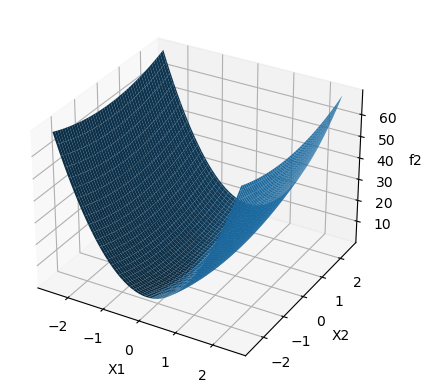

In [11]:
# Create a range of values for x1 and x2
x1 = torch.linspace(-2.5, 2.5, 100)
x2 = torch.linspace(-2.5, 2.5, 100)

# Create a grid of values
x1_grid, x2_grid = torch.meshgrid(x1, x2, indexing='xy')

# Compute the function values
X = torch.stack((x1_grid, x2_grid), dim=0)
f2_values = f2(X)

# Create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x1_grid, x2_grid, f2_values)

# Set labels
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('f2')

plt.show()

Uuhhh! Nice! We can also plot the function as a contour plot. This is a plot where the height of the function is represented by the color of the plot. The higher the function, the more red the plot is. The lower the function, the more blue the plot is. This is basically like looking at the surface above from a birds-eye-view.

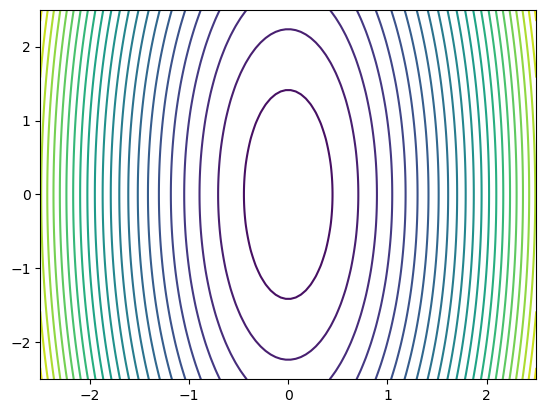

In [12]:
# Create a contour plot
plt.contour(x1_grid, x2_grid, f2_values, levels=25)
plt.show()

Generating derivatives is basically the same math but the code uses some other functions. Let's generate the first and second derivative of the function f2.

In [13]:
# Create tensors for x1 and x2 and set requires_grad=True to track computation
x = torch.tensor([1.0, 1.0])

In [14]:
# Compute the function value
y = f2(x)
y

tensor(12.)

The first derivative is a vector with the partial derivatives of the function with respect to x1 and x2. The second derivative is a matrix with the second partial derivatives of the function with respect to x1 and x2.
Namely, $\partial f_2/\partial x_1 = 20x_1$ and $\partial f_2/\partial x_2 = 2x_2$. The second derivative is $\partial^2 f_2/\partial x_1^2 = 20$ and $\partial^2 f_2/\partial x_2^2 = 2$ 
or in matrix notation $\nabla f_2 = \begin{bmatrix} 20x_1 \\ 2x_2 \end{bmatrix}$ and $\nabla^2 f_2 = \begin{bmatrix} 20 & 0 \\ 0 & 2 \end{bmatrix}$jdhvs

In [15]:
# Compute the first derivatives
df2 = torch.func.jacfwd(f2)
df2(x)

tensor([20.,  2.])

The solution is the point where the derivative is zero. This is the minimum of the function. Let's check if this is actually the minimum of the function. We will generate the second derivative of the function f2 and check if it is positive definite at the solution.

In [16]:
ddf2 = torch.func.hessian(f2)(x) # generate the second derivative from the first
ddf2 # show the second derivative

tensor([[20.,  0.],
        [ 0.,  2.]])

So this still worked out well. Generally we can find extrema (minima or maxima) analytically for polynomials up to degree two. For polynomials of degree three and higher we have to use numerical methods.

Now let's use the functions we generated to find the minimum of the function f2. We will start at x1=2 and x2=2.4 and take 300 steps with a step size of 0.01 using gradient descent. Let's take one iteration to see what happens.

In [17]:
x_0 = torch.tensor([1.0, 1.0])
x_step = gradient_descent_iteration(df2, x_0, 0.1)
x_step

tensor([-1.0000,  0.8000])

Now let's take 300 steps and plot the function and the steps we take.

In [18]:
number_of_iterations = 300
step_size = 0.01
x_0 = torch.tensor([2.0, 2.4])

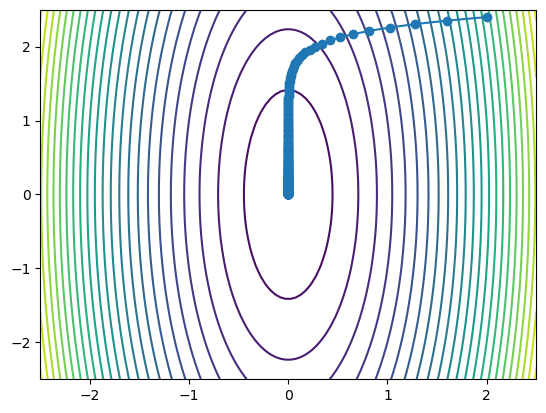

In [19]:
x_opt, y_opt, x_mat, y_mat = gradient_descent(f2, df2, x_0, step_size, number_of_iterations)
plt.contour(x1_grid, x2_grid, f2_values, levels=25)
plt.plot(x_mat[:,0], x_mat[:,1], marker='o')
plt.show()

We can see that the gradient descent method finds the minimum of the function. But it might not be very efficient. It takes a lot of steps to find the minimum. Again, feel free to play around with the step size and the number of iterations.



# Optimization with PyTorch
Gradient descent is fundamental to the Pytorch workflow. Instead of building algorithm by ourselves we can use the Pytorch optimizer. This is a class that takes care of the optimization for us. We just have to define the function we want to optimize and the optimizer will take care of the rest. Let's see how we can use the Pytorch optimizer to find the minimum of the function f2.

In [20]:
# here we use the torch optimizer to replicate the above
# we save the steps in a list to plot them later
x_0 = torch.tensor([2.0, 2.4], requires_grad=True)
# Define SGD optimizer, which is the same as gradient descent but with some modifications (more on that later)
# Note that we have to provide the variable we want to optimize over and the learning rate
# The learning rate ("lr") is the step size in gradient descent
optimizer = torch.optim.SGD([x_0], lr=step_size)

Let's take 300 steps and plot the function and the steps we take.

In [21]:

steps_list = [x_0.clone().detach()]
for i in range(300):
    optimizer.zero_grad()
    loss = f2(x_0)
    loss.backward()
    optimizer.step()
    steps_list.append(x_0.clone().detach())


Now let's plot the function and the steps we took.

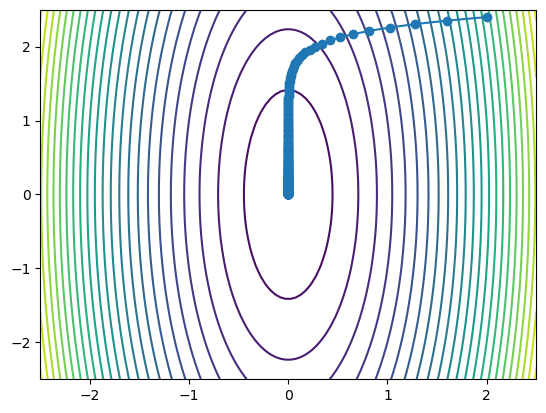

In [22]:
# plot the steps
steps = torch.stack(steps_list)
plt.contour(x1_grid, x2_grid, f2_values, levels=25)
# plot the steps
plt.plot(steps[:,0], steps[:,1], marker='o')
plt.show()

Next we will try curve fitting. This is a method to find a function that fits a set of data points.
 This basically, roughly what we also do in regression tasks in deep learning. We try to find a function that fits the data, while deep neural networks have so many parameters that they can fit almost any function. As our first example we will try to approximate our function $f_1 = x^2$ from above and instead of neural networks we will use a parameterized polynomial. These parameters are the coefficients of the polynomial which we are going to tweak such that it fits the data.

# Curve Fitting as an Example for Function Approximation


In [23]:
def f1_est(x, a):
    return a[0] + a[1]*x**2 # define the function we want to fit

Now we will generate some data from the function $f_1 = x^2$ and try to fit the function $f_1 = a_0 + a_1 x^2$ to the data. This should work rather well because we can totally eyeball that the right solution is $a_0 = 0$ and $a_1 = 1$.
Usually, in a practical setting we would not know the function $f_1 = x^2$ and we would not know the parameters $a_0$ and $a_1$. We would only have the data points and we would try to find a function that fits the data. But in this case we know the function and we will generate the data from the function. This is just to show how curve fitting works.

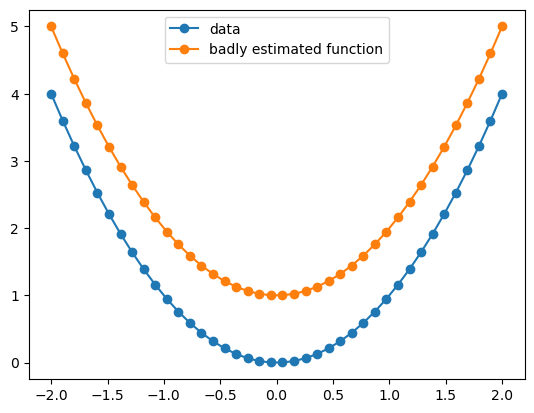

In [24]:

x_range = torch.linspace(-2,2,40) # generate points where to evaluate the function
a_true = torch.tensor([0,1]) # define the parameters of the function
data = f1_est(x_range, a_true) # evaluate the function. This is our data
plt.plot(x_range, data, marker='o', label='data') # plot the data
a_false = torch.tensor([1,1])
plt.plot(x_range, f1_est(x_range, a_false), marker='o', label='badly estimated function') # plot the function we want to fit
plt.legend()
plt.show()

Now we will also evaluate our estimation function at our x-values, but not at a_0 or a_1 values. The resulting expression will be a function of a_0 and a_1. We will call this function f1_est_eval.

You can see the result is the function at many x-values. In the following we have to tweak a_0 and a_1 such that the function fits the data. We will do this by minimizing the squared error between the data and the function. This is called the cost function. In machine learning the term loss function is more common.

In [25]:
def cost_func(x, a, data):
    cost = torch.sum((data - f1_est(x, a))**2) # define the cost function
    return cost
cost_true = cost_func(x_range, a_true, data) # evaluate the cost function
cost_false = cost_func(x_range, a_false, data) # evaluate the cost function
print(f"cost_true = {cost_true}, cost_false = {cost_false}") # show the cost function

cost_true = 0.0, cost_false = 40.0


So we build a criterion that outputs zero if the function fits the data perfectly and outputs increasingly large values the further we stray away from our perfect values. We can use this criterion to find the parameters a_0 and a_1 that minimize the cost function. This is called curve fitting. We will use gradient descent to find the parameters a_0 and a_1 that minimize the cost function. We will start at a_0=1 and a_1=1 and take 100 steps with a step size of 0.01. Let's take one iteration to see what happens.

In [26]:
a = torch.tensor([2.0, 3.0], requires_grad=True) # define the parameters a_0 and a_1

Let's try gradient descent.

In [27]:
number_of_iterations = 300
step_size = 0.0005

In [28]:
# and now the same but in a loop with the pytirch optimizer
a = torch.tensor([2.0, 3.0], requires_grad=True)
optimizer = torch.optim.SGD([a], lr=step_size)
steps_list = [a.clone().detach()]
for i in range(number_of_iterations):
    optimizer.zero_grad()
    loss = cost_func(x_range, a, data)
    loss.backward()
    optimizer.step()
    steps_list.append(a.clone().detach())
steps = torch.stack(steps_list)

Let's remember, this was our function:

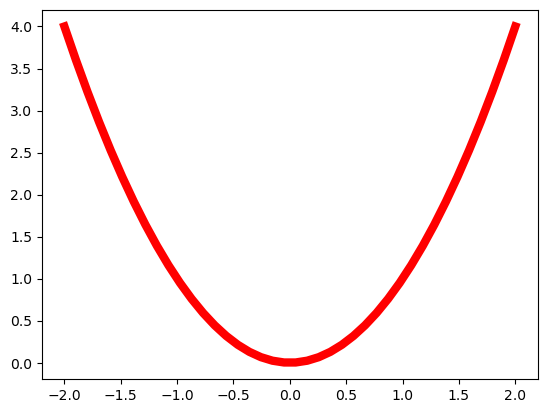

In [29]:
plt.plot(x_range, data, linewidth=6, color='red', label='data')
plt.show()

And now we plot our estimation with the parameters found by gradient descent. We will also plot intermediate result to show how gradient descent works and how it converges.

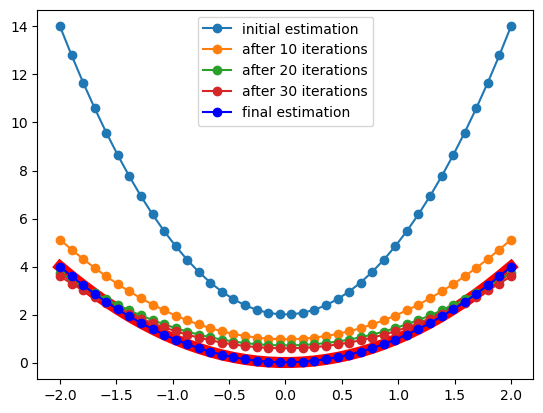

In [30]:
plt.plot(x_range, data, linewidth=8, color='red')
plt.plot(x_range, f1_est(x_range, steps[0]), marker='o',  label='initial estimation')
plt.plot(x_range, f1_est(x_range, steps[10]), marker='o', label='after 10 iterations')
plt.plot(x_range, f1_est(x_range, steps[20]), marker='o', label='after 20 iterations')
plt.plot(x_range, f1_est(x_range, steps[30]), marker='o', label='after 30 iterations')
plt.plot(x_range, 
         f1_est(x_range, steps[number_of_iterations]),
            marker='o',
            color='blue',
            label='final estimation')
plt.legend()
plt.show()

We can see that gradient descent works really well. Most of the work is already done after 10 iterations. Just a few more iterations to nail it.

So the convex function on the left has only one minimum which is the global minimum. The nonconvex functions have many local minima. Gradient descent will find one of the local minima, but not the global minimum. This is why gradient descent is not too suitable for nonconvex optimization problems. But for problem with soooo many variables such as in deep learning, gradient descent is the only algorithm that is simple and computationally tractable enough to handle the problem. Let's define a complicated, nonconvex function:

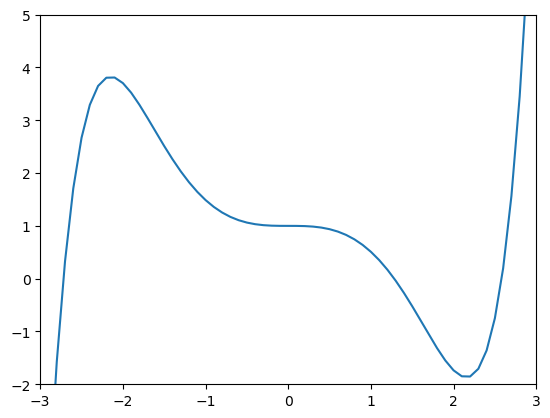

In [31]:
def nonconvex_func(x):
    return 0.01*x**7 -0.5*x**3 - 0.001*x**4 + 1
data_range = torch.arange(-15, 15, 0.1)
plt.plot(data_range, nonconvex_func(data_range))
plt.ylim(-2, 5)
plt.xlim(-3,3)
plt.show()

Perfect! One ugly nonconvex function. Now let's try to fit a polynomial to this function. We will use the same estimation function as above. But since the function is more complicated, we will use a polynomials of higher degrees. Our fitting function is like a function template, which dictates how many variables we can fit to reproduce the above curve. Since we used seven variables (or rather degrees) to produce the curve above, it is reasonable to use seven variables to reproduce it. Using less will result in a bad fit, using more will result in overfitting. Overfitting is when the function fits the data too well and does not generalize to new data. This is a common problem in machine learning. But since polynomial "templates" are a bit stubborn this won't be a problem here.

In [32]:
# write functions that create polynomials of different degrees you don't have to understand this fully... XD
class polynomial_of_degree_n:
    def __init__(self, n):
        self.degree = n
        self.polynomial = lambda x, a: a[0] + sum([a[i]*x**i for i in range(1, n+1)])
        self.cost = lambda x, a: torch.sum((data - self.polynomial(x, a))**2)
n = 7
p_est = polynomial_of_degree_n(n)

We will now generate a random starting solution and evaluate the cost function at this solution. 

In [33]:
a = torch.rand(n+1) # define the random starting parameters of the function
f_value = p_est.polynomial(data_range, a)
p_est.cost(x_range, a)
print(f"cost = {p_est.cost(x_range, a)}")
print(f"a = {a}")

cost = 16360.845703125
a = tensor([0.0438, 0.9546, 0.8325, 0.4714, 0.0610, 0.3278, 0.5788, 0.2667])


Seems like we have quite a bit of work to do to improve the cost. Let's see how gradient descent does. We have to use a smaller step size and more iterations because the function is more complex. This is also something you don't know without trying around. There are more sophisticated optimization algorithms (Newton's method. Google it!) that can handle this better. But for now we will stick with gradient descent, since it is also used in deep learning

In [34]:
# Now we use pytorch to optimize the parameters
a = torch.rand(n+1, requires_grad=True)
learning_rate = 0.00001
number_of_iterations = 50000

Let's run the optimization!

In [35]:
optimizer = torch.optim.SGD([a], lr=learning_rate)

steps_list = [a.clone().detach()]
for i in range(number_of_iterations):
    optimizer.zero_grad()
    loss = p_est.cost(x_range, a)
    loss.backward()
    optimizer.step()
    steps_list.append(a.clone().detach())
steps = torch.stack(steps_list)

This took a while. Let's see how the optimization did.

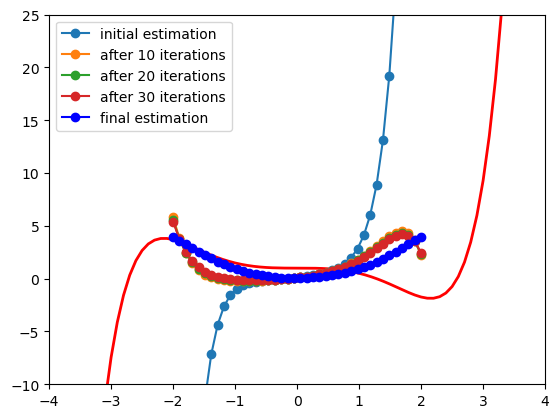

In [36]:
# plot the steps
plt.plot(data_range, nonconvex_func(data_range), linewidth=2, color='red')
plt.plot(x_range, p_est.polynomial(x_range, steps[0]), marker='o',  label='initial estimation')
plt.plot(x_range, p_est.polynomial(x_range, steps[10]), marker='o', label='after 10 iterations')
plt.plot(x_range, p_est.polynomial(x_range, steps[40]), marker='o', label='after 20 iterations')
plt.plot(x_range, p_est.polynomial(x_range, steps[60]), marker='o', label='after 30 iterations')
plt.plot(x_range, 
         p_est.polynomial(x_range, steps[-1]),
            marker='o',
            color='blue',
            label='final estimation')
# plot in the y range of -40 and + 140
plt.ylim(-10, 25)
plt.xlim(-4,4)
plt.legend()
plt.show()

We can see that the fit improves over the iterations. This is a good example to show that gradient descent can be used to optimize over many variables. In this case we optimized over 8 variables. In deep learning we often have to optimize over millions of variables. This is why gradient descent is so important in deep learning. It is the only algorithm that can handle so many variables. Feel free to play around with the step size and number of iterations to see how this affects the result.
Our neural networks are basically another "template" for fitting functions. Since they have so many parameters they can fit almost any function. Since function can describe how pedestrians move, how cars move, how they interact with each other and so on, we can use neural networks to predict the future. This is what we will do in the next weeks.